In [1]:
import numpy as np
import pandas as pd
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_excel(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat3new2.XLSX''')
df.head()


,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,1


In [ ]:
#df = pd.read_csv(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\Student Matematic.XLSX''')
#df.head()


In [ ]:
#df = pd.read_csv(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat.csv''')
#df.head()


In [ ]:
#df.to_excel('Student Matematic.xlsx', index=False)

In [3]:
conditions = [
    (df['target'] >= 1),
    (df['target'] <= 0)
        ]
values = ['Passed', 'Failed']
df['Score'] = np.select(conditions, values)
df.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,target,Score
0,0,0,18,1,1,0,4,4,0,4,...,3,4,1,1,3,6,5,6,0,Failed
1,0,0,17,1,1,1,1,1,0,1,...,3,3,1,1,3,4,5,5,0,Failed
2,0,0,15,1,0,1,1,1,0,1,...,3,2,2,3,3,10,7,8,1,Passed
3,0,0,15,1,1,1,4,2,2,3,...,2,2,1,1,5,2,15,14,1,Passed
4,0,0,16,1,1,1,3,3,1,1,...,3,2,1,2,5,4,6,10,1,Passed


In [4]:
#df = df.drop([ 'G3', 'target'],axis='columns')
df = df.drop(['target'],axis='columns')
df.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Score
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,Failed
1,0,0,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,Failed
2,0,0,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,Passed
3,0,0,15,1,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,Passed
4,0,0,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,Passed


In [5]:
inputs = df.drop('Score',axis='columns')
target = df['Score']
inputs.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,1,0,4,4,0,4,...,1,4,3,4,1,1,3,6,5,6
1,0,0,17,1,1,1,1,1,0,1,...,1,5,3,3,1,1,3,4,5,5
2,0,0,15,1,0,1,1,1,0,1,...,1,4,3,2,2,3,3,10,7,8
3,0,0,15,1,1,1,4,2,2,3,...,0,3,2,2,1,1,5,2,15,14
4,0,0,16,1,1,1,3,3,1,1,...,1,4,3,2,1,2,5,4,6,10


In [6]:
from sklearn.model_selection import train_test_split # Import train_test_split function
pred_train, pred_test, tar_train, tar_test = train_test_split(inputs, target, test_size=0.25, random_state=0)

In [7]:
tar_train.value_counts()

Passed    205
Failed    192
Name: Score, dtype: int64

In [8]:
tar_test.value_counts()


Failed    73
Passed    60
Name: Score, dtype: int64

In [9]:
param_grid_nb = {
    'var_smoothing': np.logspace(1,-9, num=100)
}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(pred_train, tar_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.1519911082952934)


In [10]:
model = GaussianNB(var_smoothing=0.1519911082952934)
classifier = model.fit(pred_train,tar_train)
classifier

GaussianNB(var_smoothing=0.1519911082952934)

In [11]:
predictions = classifier.predict(pred_test)
predictions

array(['Failed', 'Failed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Failed', 'Passed', 'Passed', 'Failed', 'Failed', 'Failed',
       'Failed', 'Passed', 'Failed', 'Failed', 'Failed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Passed', 'Failed', 'Passed', 'Failed', 'Failed',
       'Passed', 'Passed', 'Failed', 'Passed', 'Failed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Failed', 'Passed',
       'Passed', 'Passed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Passed', 'Failed', 'Failed', 'Passed', 'Failed',
       'Passed', 'Failed', 'Failed', 'Passed', 'Passed', 'Failed',
       'Failed', 'Passed', 'Passed', 'Failed', 'Failed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Passed', 'Failed', 'Pass

In [12]:
#Confusion Matrix
from sklearn import metrics
print(metrics.accuracy_score(tar_test, predictions))

0.9097744360902256


              precision    recall  f1-score   support

      Failed       0.89      0.96      0.92        73
      Passed       0.94      0.85      0.89        60

    accuracy                           0.91       133
   macro avg       0.92      0.90      0.91       133
weighted avg       0.91      0.91      0.91       133

[[70  3]
 [ 9 51]]
Matthews Correlation Coefficient: 0.8196409943698876


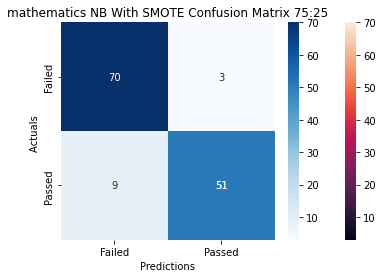

In [13]:
#Get the confusion matrix Tanpa Bagging
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
print(classification_report(tar_test, predictions))

cf_matrix1 = confusion_matrix(tar_test, predictions)
print(cf_matrix1)

import seaborn as sns
sns.heatmap(cf_matrix1, annot=True)
ax = sns.heatmap(cf_matrix1, annot=True,fmt="d", cmap='Blues')

# MCC score 1 Naive Bayes tanpa bagging
from sklearn.metrics import matthews_corrcoef
mcc_score = matthews_corrcoef(tar_test, predictions)
print("Matthews Correlation Coefficient:", mcc_score)

ax.set_title('mathematics NB With SMOTE Confusion Matrix 75:25');
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals ');

ax.xaxis.set_ticklabels(['Failed', 'Passed'])
ax.yaxis.set_ticklabels(['Failed', 'Passed'])
plt.show()

In [14]:
print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#accuracy
print("Accuracy is",accuracy_score(tar_test, predictions, normalize = True))

accuracy of training dataset is0.89
accuracy of test dataset is 0.91
Accuracy is 0.9097744360902256


In [ ]:
import time
# Measure the start time
#start_time = time.time()

# Train the classifier
#model.fit(pred_train,tar_train)

# Measure the end time
#end_time = time.time()

# Calculate the running time
#running_time = end_time - start_time
#print("Running Time:", running_time, "seconds")


Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

      Failed       0.88      0.93      0.91        73
      Passed       0.91      0.85      0.88        60

    accuracy                           0.89       133
   macro avg       0.90      0.89      0.89       133
weighted avg       0.90      0.89      0.89       133

Matthews Correlation Coefficient: 0.787644904535886
[[68  5]
 [ 9 51]]


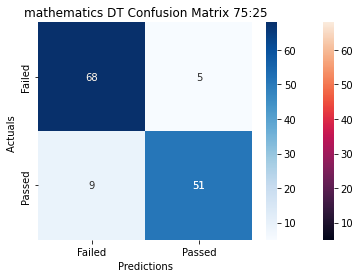

In [15]:
# Make bagging classifier
from sklearn.ensemble import BaggingClassifier


# Create a Decision Tree classifier
gnb_classifier = GaussianNB(var_smoothing=0.1519911082952934)

# Create a BaggingClassifier with Gaussian Naive Bayes as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=gnb_classifier, n_estimators=5, random_state=0)

# Train the BaggingClassifier on the training data
bagging_classifier.fit(pred_train, tar_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(pred_test)

# Calculate accuracy
accuracy = accuracy_score(tar_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

print(classification_report(tar_test, y_pred))

from sklearn.metrics import matthews_corrcoef


mcc_score = matthews_corrcoef(tar_test, y_pred)
print("Matthews Correlation Coefficient:", mcc_score)

#Get the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(tar_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ax = sns.heatmap(cf_matrix, annot=True,fmt="d", cmap='Blues')

ax.set_title('mathematics DT Confusion Matrix 75:25');
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals ');

ax.xaxis.set_ticklabels(['Failed', 'Passed'])
ax.yaxis.set_ticklabels(['Failed', 'Passed'])
plt.show()

